# 18.065 Matrix Methods in Data Analysis, Signal Processing, and Machine Learning

#### Gilbert Strang

[Course](https://ocw.mit.edu/courses/18-065-matrix-methods-in-data-analysis-signal-processing-and-machine-learning-spring-2018/video_galleries/video-lectures/)


In [17]:
import numpy as np
import pandas as pd
from sympy import Matrix, symbols, eye, zeros, simplify, factor, MatrixSymbol
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la

from linalgutil import decompose_matrix, ax0_solutions, learn_subspace_dims

## Lecture 1: The Column Space of A Contains All Vectors Ax

First lecture kicks off with refresh of fundamental concepts of linear algebra. Professor Strang introduces the column view on matrices. Every column of a matrix can be viewed as a vector in a vector space. The column space of a matrix A is the span of its columns, which means it contains all possible linear combinations of those columns.

There is a notion of independence among the columns. If the columns are linearly independent, they span a space of dimension equal to the number of columns. If they are dependent, some columns can be expressed as linear combinations of others.

Below is a simple code snippet that illustrates the concept of column space in Python using NumPy:

If square matrix A is invertible, then the column space of A is the entire space R^n. If A is not square or not full rank, the column space is a proper subspace of R^n.

In [18]:
A = np.array([
    [3, 4],
    [6, 8]
])

col_space, rmatrix, null_space = decompose_matrix(A)


display(Matrix(col_space))
display(Matrix(rmatrix))

Matrix([
[3.0],
[6.0]])

Matrix([[1.0, 1.33333333333333]])

In [19]:
A = np.array([[1],[2]])
B = np.array([3,4])

A*B

array([[3, 4],
       [6, 8]])

In [20]:
A

array([[1],
       [2]])

In [21]:
np.vstack(
    [
        *[np.matrix([[1,2],[0,1]]),np.matrix([[3,0],[0,0]])]
        ])

matrix([[1, 2],
        [0, 1],
        [3, 0],
        [0, 0]])

In [22]:
# Check rank (should be 2, since one column is dependent)
rank = np.linalg.matrix_rank(A)
print("Matrix A:")
display(Matrix(A))
print("Rank of A:", rank)

Matrix A:


Matrix([
[1],
[2]])

Rank of A: 1


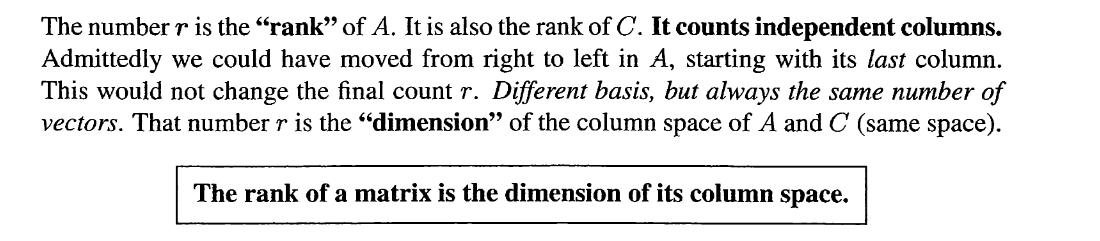

In [23]:
A = np.matrix(
    [
        [1,3,8],
        [1,2,6],
        [0,1,2]
    ]
)

In [24]:
# np.vstack([eye(2), eye(2)])
np.stack([np.eye(2), np.eye(2), np.eye(2)], axis=-1)[0,1,:]

array([0., 0., 0.])

1. Give an example where a combination of three nonzero vectors in R4 is the zero
vector. Then write your example in the form Ax = 0. What are the shapes of A and
x and 0 ?

In [25]:
# write a linear combination of 4 non zero vectors in R4
v1 = np.array([1, 2, 3, 4])
v2 = np.array([-2, -3, -4, -5])
v3 = np.array([1, 1, 1, 1])
A = np.array([v1, v2, v3]).T
# write a linear combination of the vectors in A
c = np.array([1, 1, 1])
Ax = A @ c
# print the result
print("Ax = ", Ax)
# what is the shape of A and x
print("Shape of A:", A.shape)
print("Shape of c:", c.shape)

Ax =  [0 0 0 0]
Shape of A: (4, 3)
Shape of c: (3,)


Suppose A is the 3 by 3 matrix ones(3, 3) of all ones. Find two independent vectors x and y that solve Ax = 0 and Ay = 0. Write that first equation Ax = 0 (with numbers) as a combination of the columns of A. Why don’t I ask for a third independent vector with Az = 0 ?

In [26]:
# generate 3x3 matrix with 1s
A = np.ones((3, 3))

In [27]:
x = np.array([7, -7, 0])
y = np.array([-1, 0, 1])   
Ax = A @ c
Ay = A @ y

print(Ax, Ay)


[3. 3. 3.] [0. 0. 0.]


A nullspace of a matrix A is the set of all vectors x such that Ax = 0. The nullspace is a subspace of Rn, where n is the number of columns of A. The nullspace contains the zero vector and is closed under addition and scalar multiplication.

In [28]:
A = Matrix([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

nullspace = A.nullspace()
for vec in nullspace:
    print(vec)

Matrix([[-1], [1], [0]])
Matrix([[-1], [0], [1]])


In [29]:
A = Matrix([
    [1,3],
    [5,7]
])
A.columnspace()

[Matrix([
 [1],
 [5]]),
 Matrix([
 [3],
 [7]])]

## I.2: Matrix-Matrix Multiplication AB

The product of two matrices A and B can be expressed as a sum of outer products of the columns of A and the rows of B. This means that each entry in the resulting matrix is a linear combination of the entries in A and B.

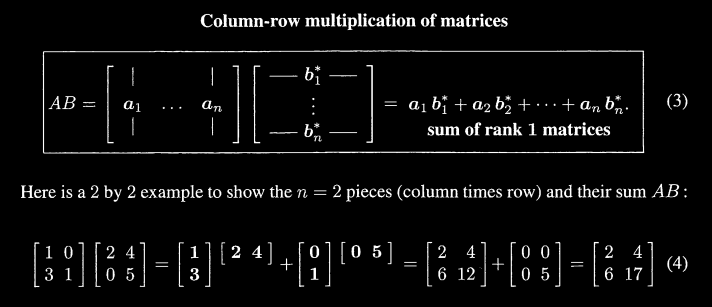

### Insight from Column times Row
Why is the outer product approach essential in data science ? The short answer is : We are
looking for the important part of a matrix A. We don't usually want the biggest number
in A (though that could be important). What we want more is the largest piece of A. And
those pieces are rank one matrices u v T. A dominant theme in applied linear algebra is :
Factor A into CR and look at the pieces ckr~ of A= CR.

### Five Important Factorisations

1. $A = LU$ (LU factorization) - comes from elimination
2. $A = QR$ (QR factorization) - comes from orthogonalization of columns
3. $S = Q \Lambda Q^T$ - comes from eigenvalues $\lambda_i$ and eigenvectors $q_i$ of symmetric matrix $S=S^T$. Eigenvalues on diagonal of $\Lambda$. _Orthonormal_ eigenvectors in columns of $Q$.
4. $A = X \Lambda X^{-1}$ (Diagonalization) - when $A$ is n by n and has n independent eigenvectors. Eigenvalues on diagonal of $\Lambda$. Eigenvectors in columns of $X$.
5. $A = U \Sigma V^T$ - SVD of any matrix A (square or not). Singular values $\sigma_i$ on diagonal of $\Sigma$. Othonormal singular vectors in columns of $U$ and $V$.

## I.3: The Four Fundamental Subspaces


$
A = \begin{bmatrix} 1 & 2 \\ 3 & 6 \end{bmatrix} = uv^T \quad \text{has } m = 2 \text{ and } n = 2.
$
  
We have subspaces of $ \mathbb{R}^2 $.

1. The column space $ \mathcal{C}(A) $ is the line through  
$
u = \begin{bmatrix} 1 \\ 3 \end{bmatrix}.
$
Column 2 is on that line.

2. The row space $ \mathcal{C}(A^T) $ is the line through  
$
v = \begin{bmatrix} 1 \\ 2 \end{bmatrix}.
$ 
Row 2 of $ A $ is on that line.

3. The nullspace $ \mathcal{N}(A) $ is the line through  
$
x = \begin{bmatrix} 2 \\ -1 \end{bmatrix}.
$
Then $ Ax = 0 $.

4. The left nullspace $ \mathcal{N}(A^T) $ is the line through  
$
y = \begin{bmatrix} 3 \\ -1 \end{bmatrix}.
$  
Then $A^T y = 0 $.

---

#### Definitions of the four fundamental subspaces:

- **The column space** $\mathcal{C}(A) $ contains all combinations of the columns of $A $.
- **The row space** $\mathcal{C}(A^T) $ contains all combinations of the columns of $A^T $.
- **The nullspace** $\mathcal{N}(A) $ contains all solutions $x $ to $Ax = 0 $.
- **The left nullspace** $\mathcal{N}(A^T) $ contains all solutions $y $ to $A^T y = 0 $.

---

We denote basis vectors as $u$ and $v$ for the column and row spaces, respectively. The nullspace and left nullspace are denoted as $x$ and $y$. \
Always the basis vectors will be independet vectors. They form a "basis" of each of subspaces. 

---


Note: rank is the number of independent columns in $A$ or $A^T$. This should be separated from the dimension of of the space vectors live in. 

In [30]:
A = np.array(
    [
        [1,2],
        [3,12],
        [4,5]
    ]
)
C, R, N = decompose_matrix(A)
print(f"column space rank C(A): {np.linalg.matrix_rank(A)}")
print(f"dimension of ambient space for columns of A: {C.shape[0]}")
display(Matrix(C))

column space rank C(A): 2
dimension of ambient space for columns of A: 3


Matrix([
[1.0,  2.0],
[3.0, 12.0],
[4.0,  5.0]])

__Counting Law__: r independent equations $Ax = 0$ have $n - r$ independent solutions. 

In [31]:
ax0_solutions(A)

'There is only the trivial solution x = 0.'

From column space rank we know dimensions of all four fundamental subspaces:
1. column space $\mathcal{C}(A)$ = $r$.
2. row space $\mathcal{C}(A^T)$ = $r$.
3. nullspace $\mathcal{N}(A)$ = $n - r$.
4. left nullspace $\mathcal{N}(A^T)$ = $m - r$.

In [32]:
learn_subspace_dims(A)

Column space dimension: 2
Row space dimension: 2
Null space dimension: 0
Null space transpose dimension: 1


(np.int64(2), np.int64(0), np.int64(2), np.int64(1))